Loading training images...
Found 101 images belonging to 2 classes.
Found 101 training images belonging to 2 classes.
Loading test images...
Found 93 images belonging to 2 classes.
Found 93 test images belonging to 2 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,850,113 (90.98 MB)

 Trainable params: 262,401 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)


Starting model training...
Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6077 - loss: 0.7087

c:\Users\pardh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_loss improved from inf to 0.63918, saving model to resnet50_id_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.5951 - loss: 0.7146 - val_accuracy: 0.6452 - val_loss: 0.6392
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 954ms/step - accuracy: 0.5358 - loss: 0.7194
Epoch 2: val_loss did not improve from 0.63918
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.5415 - loss: 0.7168 - val_accuracy: 0.6022 - val_loss: 0.6432
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5431 - loss: 0.6720 
Epoch 3: val_loss did not improve from 0.63918
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.5395 - loss: 0.6772 - val_accuracy: 0.7527 - val_loss: 0.6693
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 850ms/step - accuracy: 0.5498 - loss: 0.7205
Epoch 4: val_loss did not improve from 0.63918
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.5547 - loss: 0.7150 - val_accuracy: 0.6344 - val_loss: 0.6774
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 893ms/step - accuracy: 0.4855 - loss: 0.6994
Epoch 5: val_loss did not improve from 0.63918
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2

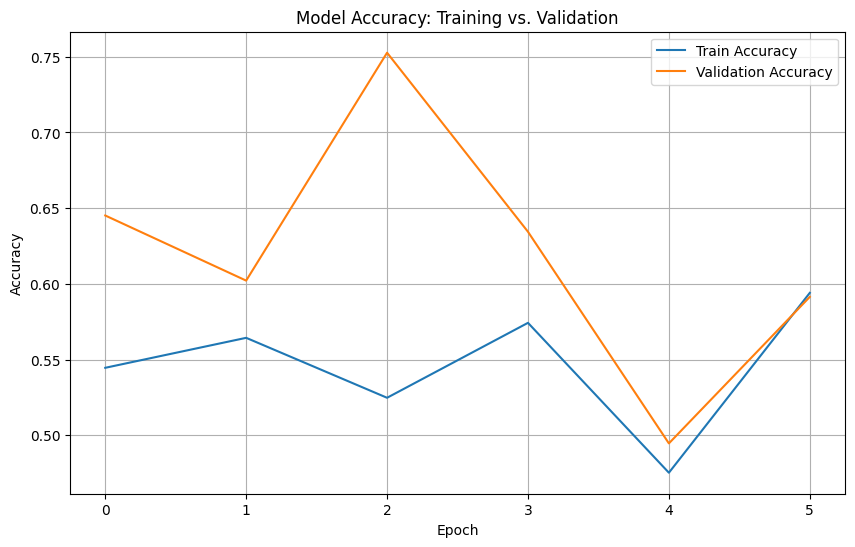

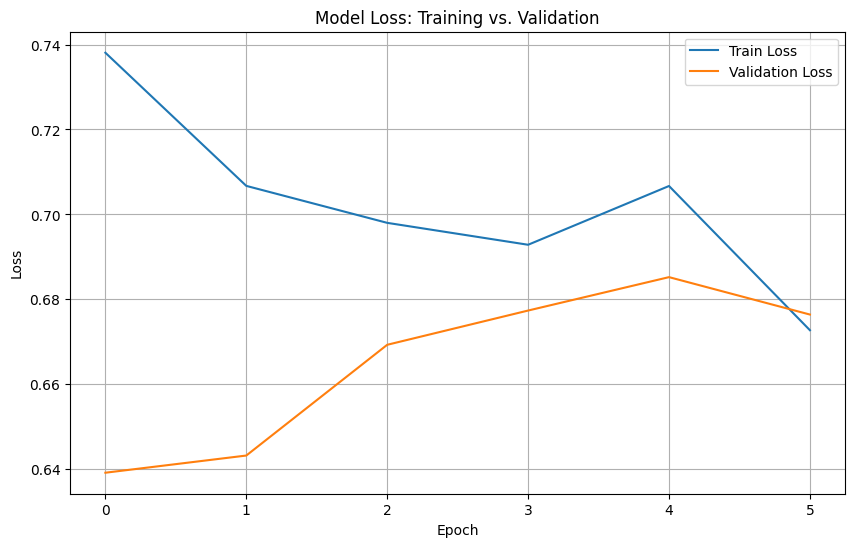

✅ Model training completed and saved to 'final_resnet50_model.h5'.

Evaluating the final model on the test set...
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.6077 - loss: 0.6606
Test Loss: 0.6392
Test Accuracy: 0.6452


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import os 

train_dir = 'dataset3/train/'
test_dir = 'dataset3/test/'

# Verify that the directories exist.
# This helps in early detection of path issues before flow_from_directory is called.
if not os.path.exists(train_dir):
    print(f"Error: Training directory '{train_dir}' not found.")
    print("Please ensure your dataset is structured like: dataset/train/class_A, dataset/train/class_B, etc.")
    exit() # Exit if training directory is missing

if not os.path.exists(test_dir):
    print(f"Error: Test directory '{test_dir}' not found.")
    print("Please ensure your dataset is structured like: dataset/test/class_A, dataset/test/class_B, etc.")
    exit() # Exit if test directory is missing

# --- 2. Image Preprocessing and Augmentation ---
train_datagen = ImageDataGenerator(
    rescale=1./255,             
    rotation_range=15,          
    width_shift_range=0.1,      
    height_shift_range=0.1,     
    horizontal_flip=True        
)

test_datagen = ImageDataGenerator(
    rescale=1./255              # Only rescale test images, no augmentation
)

# --- 3. Load Images from Directories ---

print("Loading training images...")
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary' # Set to 'binary' for two classes
)

# Add explicit check for NoneType error (though flow_from_directory should not return None)
if train_generator is None:
    print("Error: train_generator is None. This indicates a problem with ImageDataGenerator.flow_from_directory.")
    print("Please check your TensorFlow/Keras installation and ensure your dataset is valid.")
    exit()

# Use .n instead of .num_samples for total number of samples
print(f"Found {train_generator.n} training images belonging to {train_generator.num_classes} classes.")

# Add a check for empty generator
if train_generator.n == 0:
    print(f"Error: No training images found in '{train_dir}'.")
    print("Please ensure the directory contains subfolders, each representing a class, with images inside.")
    exit()


print("Loading test images...")
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary' # Set to 'binary' for two classes
)

# Add explicit check for NoneType error (though flow_from_directory should not return None)
if test_generator is None:
    print("Error: test_generator is None. This indicates a problem with ImageDataGenerator.flow_from_directory.")
    print("Please check your TensorFlow/Keras installation and ensure your dataset is valid.")
    exit()

# Use .n instead of .num_samples for total number of samples
print(f"Found {test_generator.n} test images belonging to {test_generator.num_classes} classes.")

# Add a check for empty generator
if test_generator.n == 0:
    print(f"Error: No test images found in '{test_dir}'.")
    print("Please ensure the directory contains subfolders, each representing a class, with images inside.")
    exit()


# Ensure there are at least two classes for binary classification
if train_generator.num_classes != 2:
    print(f"Warning: Expected 2 classes for binary classification, but found {train_generator.num_classes} in training data.")
    print("Please ensure your 'train' directory has exactly two subfolders (classes).")
    # Consider exiting here if strict binary classification is required
if test_generator.num_classes != 2:
    print(f"Warning: Expected 2 classes for binary classification, but found {test_generator.num_classes} in test data.")
    print("Please ensure your 'test' directory has exactly two subfolders (classes).")
    # Consider exiting here if strict binary classification is required


# --- 4. Build the Model (Transfer Learning with ResNet50) ---
# Load the pre-trained ResNet50 model from Keras Applications.
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model.
# This prevents their weights from being updated during the initial training phase,
# preserving the learned features from ImageNet.
base_model.trainable = False

# Create a new Sequential model and add the frozen base model.
model = models.Sequential([
    base_model,                                 
    layers.GlobalAveragePooling2D(),            # Reduce spatial dimensions to a single vector per feature map
    layers.Dense(128, activation='relu'),       # A dense layer for classification, with ReLU activation
    layers.Dropout(0.5),                        # Dropout for regularization to prevent overfitting
    layers.Dense(1, activation='sigmoid')       # Output layer for binary classification (sigmoid for probability)
])

# Display the model summary to see the architecture and number of parameters.
model.summary()

# --- 5. Compile the Model ---
# Configure the model for training.
# optimizer: Adam is a popular choice for its adaptive learning rate.
# learning_rate: A small learning rate is often used in transfer learning to fine-tune.
# loss: 'binary_crossentropy' is suitable for binary classification tasks.
# metrics: 'accuracy' is used to monitor performance during training.
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# --- 6. Define Callbacks ---
# Callbacks are functions that can be applied at certain stages of the training procedure.
# ModelCheckpoint: Saves the model's weights (or the entire model) after each epoch if it's the best so far.
#   "resnet50_id_classifier.h5": File path to save the model.
#   save_best_only=True: Only saves the model when `val_loss` improves.
checkpoint = ModelCheckpoint("resnet50_id_classifier.h5", save_best_only=True, monitor='val_loss', mode='min', verbose=1)

# EarlyStopping: Stops training when a monitored quantity has stopped improving.
#   patience=5: Training will stop if `val_loss` doesn't improve for 5 consecutive epochs.
#   restore_best_weights=True: Restores model weights from the epoch with the best `val_loss`.
early_stop = EarlyStopping(patience=5, restore_best_weights=True, monitor='val_loss', mode='min', verbose=1)

# --- 7. Train the Model ---
print("\nStarting model training...")
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=20, # Maximum number of epochs to train
    callbacks=[checkpoint, early_stop] # Apply the defined callbacks
)
print("Model training completed.")

# --- 8. Plot Training History ---
# Visualize the training and validation accuracy over epochs to assess performance and overfitting.
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy: Training vs. Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss: Training vs. Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


# --- 9. Save Final Model ---
# Save the entire trained model (architecture, weights, optimizer state) for future use.
final_model_path = "final_resnet50_model.h5"
model.save(final_model_path)
print(f"✅ Model training completed and saved to '{final_model_path}'.")

# Optional: Evaluate the model on the test set
print("\nEvaluating the final model on the test set...")
loss, accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
